### Latar Belakang Masalah

Airbnb adalah online marketplace yang menyediakan akomodasi bagi orang-orang yang ingin menyewa ataupun menyewakan kamar pribadi, apartemen, villa, maupun rumahnya. Pada umumnya, properti yang ditawarkan layanan akomodasi ini dapat disewa secara harian dan harganya ditetapkan oleh pemilik properti. Airbnb juga mewajibkan tamu/guest dan tuan rumah/host untuk meninggalkan review setelah masa menginapnya berakhir. Review sangat penting untuk membantu membangun kepercayaan terhadap Airbnb dan merupakan cara penting bagi tuan rumah dan tamu untuk saling memberikan masukan.

Airbnb mendapatkan penghasilan dari setiap transaksi (booking) yang terjadi. Saat ini, ada 2 jenis layanan yang disediakan oleh Airbnb, yaitu Stay dan Experience. Untuk Airbnb stays, service fee yang dibebankan kepada host adalah sebesar 3% dari harga sewa. Sedangkan service fee yang dibebankan kepada traveler cukup bervariasi di kisaran 11% - 14% dari harga sewa; tergantung pada banyak hal seperti lokasi listing, lamanya menginap, jumlah orang yang menginap, dll.

Untuk dataset yang disediakan, data ini lebih ke arah layanan airbnb stay

### Pernyataan masalah

Dari dataset tersebut, kita dapat mengidentifikasi sejumlah aspek penting, seperti **karakteristik listing Airbnb bangkok berdasarkan wilayah geografisnya**. Informasi ini akan membantu dalam pengambilan keputusan terkait manajemen properti dan strategi pemasaran.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

- Bagaimana pola karakteristik listing Airbnb di Bangkok berdasarkan wilayah geografisnya ?
- Bagaimana informasi ini dapat memberi saran yang nantinya digunakan untuk menaikkan performa host dalam hal jumlah review ?

In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt    

#import chi2_contingency library
from scipy.stats import chi2_contingency

In [335]:
df_listing = pd.read_csv(r"C:\Users\moh_y\python_project\bootcamp\modul_2\capstone\Airbnb Listings Bangkok.csv")
display(df_listing.head(),df_listing.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


- Sebelum melanjutkan dengan analisis lebih lanjut, kita hilangkan kolom 'Unnamed: 0' yang sebelumnya digunakan sebagai indeks, namun terdapat kesalahan dalam penyimpanan dataset sebelumnya.

In [336]:
df_listing.drop(columns='Unnamed: 0', inplace=True)

## Data Understanding and Cleaning

In [337]:
print(f'Jumlah baris dan kolom di dataset airbnb listing bangkok adalah {df_listing.shape}')
df_listing.info()

Jumlah baris dan kolom di dataset airbnb listing bangkok adalah (15854, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review      

In [338]:

display(df_listing.describe(), df_listing.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [339]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df_listing.columns :
    listItem.append( [col, df_listing[col].nunique(), df_listing[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 b

In [340]:
df_listing.isna().sum()/df_listing.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

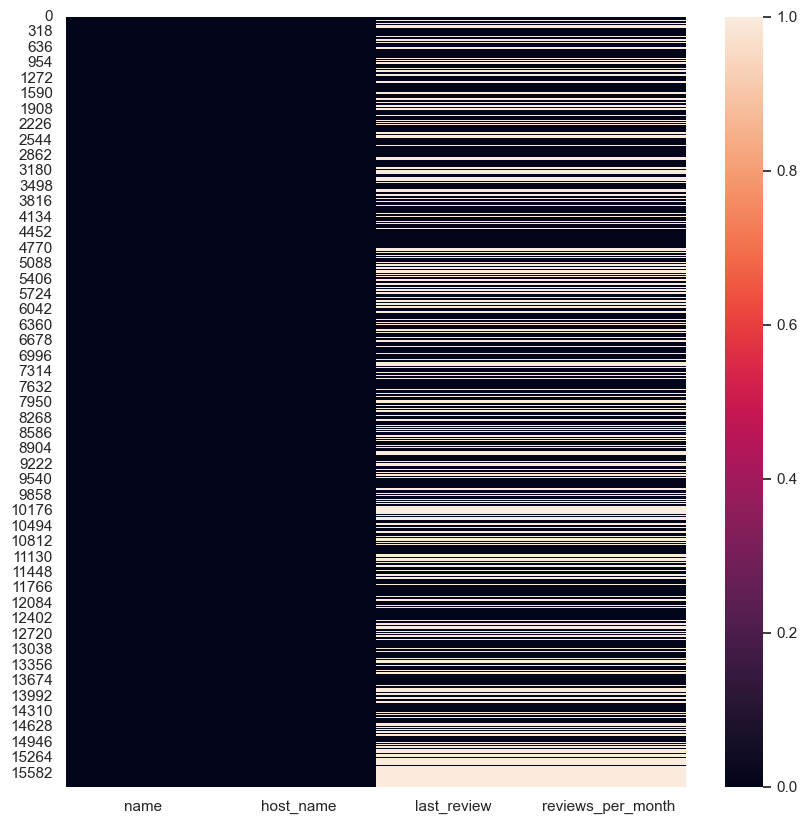

In [341]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df_listing[['name','host_name','last_review','reviews_per_month']].isna())

### Secara umum, kita bisa melihat bahwa:

1. Dataset *airbnb listings bangkok* memiliki 16 kolom dan 15854 baris
2. Beberapa kolom, seperti kolom `name`, `host_name`, `last_review`, dan `reviews_per_month` memiliki data kosong alias NaN.
3. Kolom `last_review` memiliki data tipe object. Sedangkan dari penjelasannya harusnya kolom ini merupakan kolom bertipe data datetime.
4. Ketika dilakukan statistika desktiptif pada indeks min ditemukan `kolom` price berisi 0. Dan ini perlu kita analisa lebih lanjut karena tidak mungkin menyewakan dengan harga 0.

- mencari nilai kosong atau NaN pada kolom `last_review` dan `reviews_per_month`. disini bisa kita lihat bahwa nilai *NaN* disebabkan karena kolom `number_of_reviews` itu 0
- jadi kita bisa mengisi nilai pada kolom `reviews_per_month` dengan nilai 0. yang mana nilai 0 melambangkan bahwa belum adanya review sama sekali.
- sedangkan untuk kolom `last_review` bisa kita drop dikarenakan kolom ini nantinya tidak kita gunakan 

In [342]:
df_listing.drop(columns='last_review',inplace=True)

In [343]:
df_listing['reviews_per_month'].fillna(0, inplace=True)

df_listing.isna().sum()

id                                0
name                              8
host_id                           0
host_name                         1
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [344]:
df_listing[df_listing['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,0.00,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,0.00,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,0.00,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,0.00,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,0.00,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,0.00,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,0.03,3,220,0


In [345]:
df_listing.loc[df_listing['name'].isna(), 'name'] = df_listing.loc[df_listing['name'].isna(),'room_type'] + ' in bangkok'

- selanjutnya mari kita lihat kolom `host_name` yang mempunyai nilai NaN.
- kita coba pastikan di website airbnb `host_name` yang NaN ini memang kosong nilainya dengan cara memasukkan `host_id` yang ada ke website airbnb.
- setelah kita coba akses **https://www.airbnb.co.id/users/show/137488762** bahwa memang namanya 'none' sehingga terdeteksi sebagai nilai kosong. disini kita bisa entry 'host_name' menjadi 'none' dengan catatan kita ubah ke dalam bentuk string agar tidak dianggap nilai kosong.

In [346]:
df_listing[df_listing['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,0.02,1,365,0


In [347]:
df_listing['host_name'].fillna('none', inplace=True)

df_listing.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

- sekarang mari kita drop kolom price yang berharga 0. dikarenakan tidak mungkin seorang host menyewakan propertinya secara gratis 

In [348]:
df_listing.drop(df_listing[df_listing['price'] <= 0].index, inplace=True)

### cek data duplicate

In [349]:
# menghitung jumlah total baris duplikat
n_duplicate = len(df_listing[df_listing.duplicated()])
n_duplicate

0

In [350]:
# cek jumlah data unik pada kolom id
df_listing['id'].nunique()

15853

In [351]:
# cek jumlah baris pada dataset airbnb
df_listing.shape

(15853, 15)

## cek outlier yang ada

- kita akan cek outlier pada kolom `price` berdasarkan `room_type`

c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='room_type', ylabel='price'>

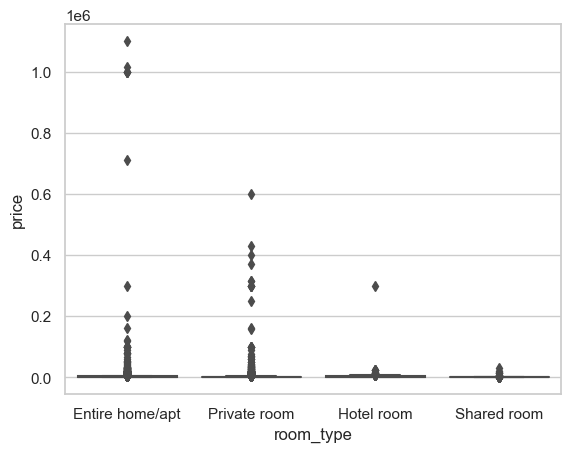

In [352]:
sns.boxplot(data = df_listing,x='room_type', y='price')

bisa kita lihat pada grafik diatas, *Entire home/apt*, *Private room* dan *Hotel room* memiliki outlier price yang cukup banyak. sebelum kita memutuskan untuk menghapus atau tidaknya outlier tersebut, ada baiknya kita cek terlebih dahulu:

In [353]:
df_listing[df_listing['room_type']=='Entire home/apt'].sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,0.00,1,365,0
12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,131427125,Jj,Vadhana,13.746660,100.559100,Entire home/apt,1014758,30,2,0.32,10,75,2
6289,29909847,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,210559448,Cora,Khlong Toei,13.703330,100.592470,Entire home/apt,1000000,2,69,1.39,6,90,0
9345,39858231,1BR cozy condo close to ONNUT BTS.,210559448,Cora,Khlong Toei,13.704960,100.591510,Entire home/apt,1000000,25,2,0.05,6,88,0
4620,23740993,"Modern&Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.760650,100.568980,Entire home/apt,1000000,1,12,0.22,4,336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11215,44327659,"Cozy condo, south of Chao Phraya, 100m from BTS",187810737,Lucy,Thon buri,13.721110,100.492850,Entire home/apt,348,360,0,0.00,1,364,0
9657,40682461,Stay in Bangkok,300906280,อัญชลี,Bang Kapi,13.801650,100.617990,Entire home/apt,346,2,5,0.18,3,326,4
1481,9465632,Condo near BTS - Bangwa Station,48621743,Joke,Phasi Charoen,13.720890,100.459850,Entire home/apt,346,180,0,0.00,1,365,0
5246,26251682,Elio Condominium near Sukhumvit Onnut,66095049,Michael,Phra Khanong,13.687070,100.599630,Entire home/apt,337,60,0,0.00,1,96,0


In [354]:
df_listing[df_listing['room_type']=='Private room'].sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4373,22633450,rm 1 : cozy & comfy,117057915,Jeab,Bang Phlat,13.791630,100.490380,Private room,600700,1,9,0.17,5,330,0
11885,52940323,🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape,99882630,Jiranuch,Bang Kapi,13.760820,100.633660,Private room,429443,1,0,0.00,1,313,0
12792,629653142142561774,rm 6 : bright morning sunlight.,117057915,Jeab,Bang Phlat,13.790490,100.488160,Private room,400717,1,0,0.00,5,241,0
6549,31365769,"WH (container, Double bed, 2ppl -F)",234881965,Napawadee,Khlong Toei,13.735140,100.552170,Private room,372227,1,24,0.50,4,147,0
6760,31364368,"WH (Container style, twin bed, 2ppl, citycenter-A)",234881965,Napawadee,Khlong Toei,13.735050,100.552390,Private room,314899,1,4,0.10,4,147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11663,49745793,วิภาแมนชั่น ติดถนนลาดพร้าว83 สะดวกและสบาย,360388789,นิภาวรรรณ,Wang Thong Lang,13.785760,100.614520,Private room,315,120,0,0.00,1,365,0
7831,34752495,Local life near svarnmbumi airport ; nature,131930129,Gondal,Nong Chok,13.814480,100.835430,Private room,310,1,0,0.00,1,89,0
8974,38406752,🏡5 mins walk to 🚅 Cozy room in a local living😊,29685153,Mon,Phasi Charoen,13.726350,100.465140,Private room,304,2,16,0.42,2,330,11
9529,40547972,Private fan room with local family,314098135,Khwanjai,Bangkok Noi,13.754210,100.470770,Private room,300,1,1,0.03,1,227,0


In [355]:
df_listing[df_listing['room_type']=='Hotel room'].sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2668,16139502,Nice Check-in My Hostel (Private 2 beds),51074483,Nuttawut,Ratchathewi,13.75113,100.52731,Hotel room,300000,1,2,0.03,5,365,0
3415,19469957,Stylish 2 Bedroom Apartment in Ekkamai,33550104,Kasamsan,Vadhana,13.73511,100.59068,Hotel room,24390,2,62,0.94,6,179,6
6281,30329172,European Design In The City Near Shopping Mall,226941360,Patawan,Vadhana,13.74248,100.55770,Hotel room,23671,1,0,0.00,6,89,0
6283,30329222,One Bed In The City of Sukhumvit Near SkyTrain,226941360,Patawan,Vadhana,13.74226,100.55934,Hotel room,23629,1,0,0.00,6,0,0
6282,30329202,Bedroom In Town Central of Sukhumvit Near BTS,226941360,Patawan,Vadhana,13.74218,100.55802,Hotel room,23029,1,0,0.00,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,30240982,Mum Sabaay Hostel,227101089,Phrawpanthana,Sathon,13.71624,100.52066,Hotel room,330,1,0,0.00,1,0,0
8445,37029994,Mind day Hostel Khaosan 12-Mixed DormitoryFL.3,277316591,Mindday,Phra Nakhon,13.76101,100.49881,Hotel room,326,1,4,0.10,6,363,0
8983,38611956,Mind Day Hostel Khaosan - 12 Mixed Dormitory,277316591,Mindday,Phra Nakhon,13.76276,100.49761,Hotel room,318,1,2,0.05,6,365,0
2770,16443912,4Beds Female Dormitory@Baan 89 Hostel,62060341,Baan 89,Phra Nakhon,13.75451,100.50229,Hotel room,318,1,1,0.02,5,271,0


dari hasil diatas dapat kita simpulkan

1. Kita masih bisa menyimpan data ini karena host memiliki kebebasan untuk menentukan harga sewa yang bervariasi sesuai dengan properti mereka. Fakta bahwa beberapa ulasan telah ditinggalkan, yang dapat dilihat dari kolom `number_of_reviews` yang tidak kosong, menunjukkan bahwa sebagian tamu puas dengan harga yang ditawarkan. Ini mungkin menandakan bahwa fasilitas yang ditawarkan oleh host sebanding dengan harga yang mereka kenakan.

## Add New Variable/Column

Bangkok terdiri dari 50 distrik, disini kita membagi distrik tersebut menjadi 5 bagian sesuai dengan letak geografisnya (Inner, Middle, Outer)

In [356]:
region = []

outer = ['Thawi Watthana', 'Taling Chan', 'Nong Khaem', 'Bang Bon', 'Bang Khun thain', 'Don Mueang', 'Lak Si', 'Khlong Sam Wa', 'Nong Chok', 'Min Buri', 'Lat Krabang']
middle = ['Bang Phlat', 'Bang Khae', 'Phasi Charoen', 'Chom Thong', 'Thung khru', 'Rat Burana', 'Phra Khanong', 'Bang Na', 'Pra Wet', 'Suanluang', 'Bang Kapi', 'Saphan Sung', 'Wang Thong Lang', 'Khan Na Yao', 'Bueng Kum', 'Lat Phrao', 'Bang Khen', 'Sai Mai']
inner = ['Chatu Chak', 'Bang Sue', 'Phaya Thai', 'Din Daeng', 'Dusit', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Parthum Wan', 'Bang Rak', 'Sathon', 'Yan na wa', 'Bang Kho laen', 'Thon buri', 'Bangkok Yai', 'Bangkok Noi', 'Phra Nakhon', 'Pom Prap Sattru Phai', 'Samphanthawong', 'Khlong Toei', 'Khlong San']
    

for district in df_listing['neighbourhood']:
    if district in outer:
        region.append('Outer')
    elif district in middle:
        region.append('Middle')
    elif district in inner:
        region.append('Inner')
    elif district not in outer and district not in middle and district not in inner:
        region.append('Unknown')

df_region = pd.DataFrame(data=region,columns=['Region'])

# Mengatur ulang indeks untuk menyamakan indeks di kedua DataFrames
df_listing.reset_index(drop=True, inplace=True)
df_region.reset_index(drop=True, inplace=True)

# Melakukan penggabungan
df_listing_clean = pd.concat([df_listing, df_region], axis=1)
df_listing_clean


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Region
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0,Inner
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0.00,2,358,0,Middle
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0.00,1,365,0,Middle
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1,Inner
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0.00,3,365,0,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0.00,1,362,0,Middle
15849,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0.00,14,365,0,Inner
15850,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0.00,14,365,0,Inner
15851,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0.00,14,365,0,Inner


## Data Analysis

Kita sudah melakukan tahap data cleaning. Sekarang, kita bisa mulai melakukan analisis untuk menjawab rumusan masalah : mengidentifikasi karakteristik listing Airbnb berdasarkan wilayah geografis di Bangkok.

Rumusan masalah di atas akan dipecah menjadi tiga faktor untuk di analisis.

1. Analisis Jumlah Reviewer per wilayah geografis
2. Analisis Tipe ruangan per wilayah geografis berdasarkan Jumlah Reviewnya
3. Analisis Harga Perwilayah

# 1. Analisis Jumlah Reviewer per wilayah geografis

Analisis ini bertujuan untuk mengetahui sebaran jumlah reviewer di wilayah geografis Bangkok yang mana nantinya kita akan mengidentifikasi pola atau perbedaan yang mungkin ada antar wilayah.

In [357]:
df_region = df_listing_clean.groupby('Region')[['number_of_reviews']].sum().rename(columns={'number_of_reviews':'Total Review'}).reset_index().sort_values(by='Total Review',ascending=False)
df_region

,Region,Total Review
0,Inner,231599
1,Middle,25084
2,Outer,7352


Berdasarkan artikel [A Case Study of Urban Housing Projects in Bangkok, Thailand](https://www.mdpi.com/2071-1050/14/14/8388) dan [Molecular Detection of Bartonella in Bangkok, Thailand](https://www.researchgate.net/publication/351051652_Molecular_Detection_of_Bartonella_spp_and_Hematological_Evaluation_in_Domestic_Cats_and_Dogs_from_Bangkok_Thailand) berdasarkan letak geografisnya, 50 distrik di Bangkok dapat dikelompokkan menjadi 3 Wilayah :
1. Inner
2. Middle
3. outer

c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


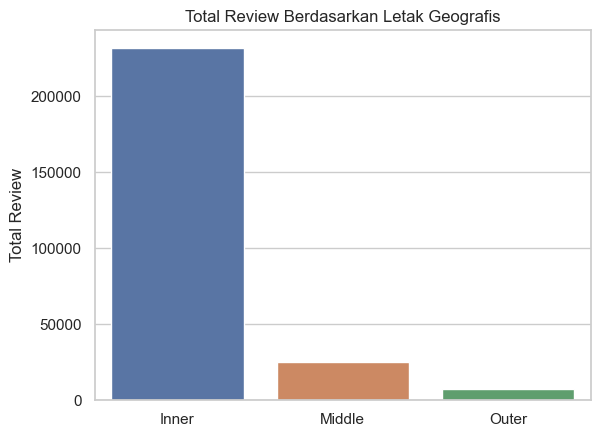

In [358]:
sns.barplot(data=df_region, x='Region', y='Total Review')
plt.xlabel('')
plt.ylabel('Total Review')
plt.title('Total Review Berdasarkan Letak Geografis')
plt.show()

Dari grafik diatas dapat kita lihat bahwa daerah Inner bangkok memiliki jumlah reviewer tertinggi sedangkan daerah Outer bangkok 
memiliki jumlah review terendah. Berikut merupakan karakteristik per wilayah berdasarkan riset:
1. Inner Bangkok memiliki jumlah reviewer tertinggi karena keberagaman atraksi wisata yang terkonsentrasi di pusat kota, termasuk tempat-tempat ikonik dan kehidupan malam yang ramai, sehingga menarik wisatawan untuk menginap di lokasi yang sentral. Selain itu, pusat kota menawarkan ragam akomodasi mulai dari penginapan mewah hingga budget, memenuhi berbagai kebutuhan wisatawan dengan pilihan yang beragam. Kemudahan akses transportasi dan keberadaan fasilitas serta layanan yang memadai di sekitar pusat kota juga menjadi daya tarik, membuatnya menjadi tujuan favorit para wisatawan.
2. Jumlah reviewer yang lebih rendah di wilayah Outer Bangkok mungkin disebabkan oleh kurangnya atraksi wisata yang signifikan atau kurangnya ketersediaan akomodasi yang menarik wisatawan untuk menginap di wilayah tersebut.

# 2. Analisis Tipe ruangan per daerah

Analisis ini bertujuan untuk mengetahui jenis-jenis ruangan yang disewakan di setiap daerah di Bangkok untuk memahami preferensi host per Wilayah.

Pertanyaan:
1. Apa jenis ruangan yang paling banyak di Bangkok ? <br>
2. Apakah ada perbedaan jumlah reviewer dalam jenis ruangan antar region inner, middle dan outer ?

In [359]:
#   menghitung persentasi tiap tipe kamar yang ada di bangkok

room_type_count = df_listing['room_type'].value_counts()
percentage_room = room_type_count / len(df_listing) * 100
percentage_room

room_type
Entire home/apt    56.216489
Private room       36.396896
Hotel room          4.087554
Shared room         3.299060
Name: count, dtype: float64

Ada empat tipe tempat menginap di Airbnb, yaitu seluruh rumah, kamar pribadi, kamar hotel, dan kamar bersama. Berikut penjelasan singkat mengenai masing-masing tipe kamar:

- Entire home/apt: Tipe kamar ini cocok bagi Anda yang ingin merasakan pengalaman tinggal di rumah yang lengkap dengan fasilitas seperti kamar tidur, kamar mandi, dapur, dan pintu masuk yang terpisah. Tuan rumah harus mencantumkan di deskripsi apakah mereka akan berada di properti atau tidak.
- Private room: Tipe kamar ini cocok bagi Anda yang ingin merasakan privasi namun tetap ingin merasakan koneksi lokal. Jika Anda memesan kamar pribadi, Anda akan memiliki kamar sendiri untuk tidur namun berbagi beberapa area dengan orang lain, seperti tuan rumah atau tamu lainnya.
- Hotel room: Tipe kamar ini mirip dengan kamar pribadi, namun terletak di hotel.
- Shared room: Tipe kamar ini biasanya merupakan pilihan yang paling terjangkau. Anda akan berbagi kamar dengan tamu lain dan mungkin juga berbagi kamar mandi dan area umum lainnya.

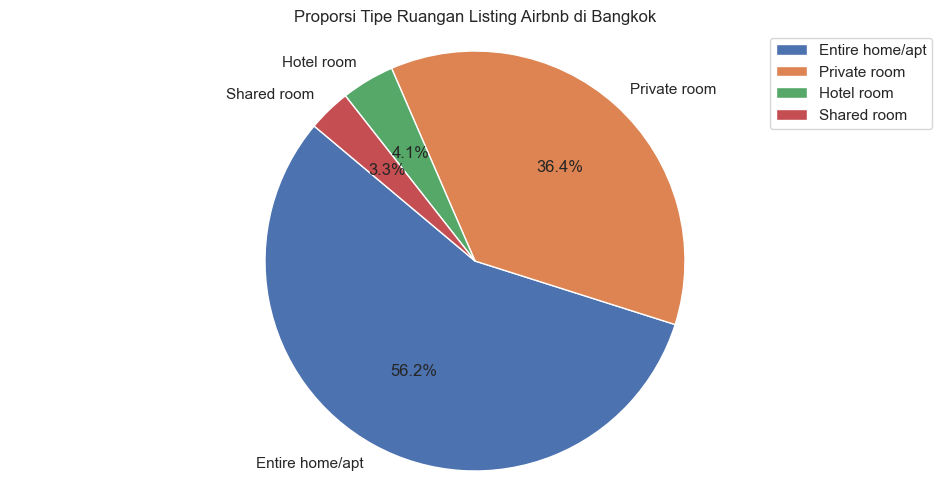

In [360]:
plt.figure(figsize=(12, 6)) 
plt.pie(percentage_room, labels=percentage_room.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.title('Proporsi Tipe Ruangan Listing Airbnb di Bangkok')
plt.legend(percentage_room.index, loc='upper right')


plt.show()

Proporsi tipe kamar tertinggi dalam data secara keseluruhan adalah Entire home/apt, mencapai sekitar 56%, diikuti oleh Private room yang mencapai 36%. Hal ini menandakan bahwa sebagian besar listing Airbnb adalah rumah atau apartemen lengkap yang disewakan kepada tamu, diikuti oleh kamar pribadi yang mungkin berbagi fasilitas dengan pemilik atau tamu lainnya.

In [361]:
agg_df = df_listing_clean.groupby(['Region', 'room_type'])['number_of_reviews'].sum().reset_index()

# Buat pivot table
pivot = pd.pivot_table(agg_df, values='number_of_reviews', index='Region', columns='room_type', aggfunc='sum', fill_value=0)
pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room
Region,,,,
Inner,175457,11636,42120,2386
Middle,20195,334,4343,212
Outer,2291,730,4247,84


In [362]:
stats, pvalue, dof, expected = chi2_contingency(pivot)

print("Nilai p:", pvalue)

if pvalue <= 0.05:
    print("Ada hubungan signifikan antara 'Region' dan 'room_type'")
else:
    print("Tidak ada hubungan penting antara 'Region' dan 'room_type'")

Nilai p: 0.0
Ada hubungan signifikan antara 'Region' dan 'room_type'


In [363]:
pivot = pivot.div(pivot.sum(axis=1), axis=0)
pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room
Region,,,,
Inner,0.757590,0.050242,0.181866,0.010302
Middle,0.805095,0.013315,0.173138,0.008452
Outer,0.311616,0.099293,0.577666,0.011425


<Figure size 1000x600 with 0 Axes>

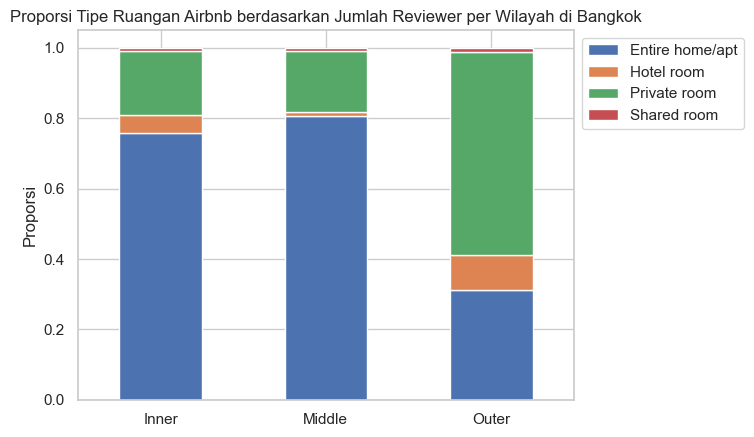

In [364]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = pivot.plot(kind='bar', stacked=True)
plt.xlabel('')
plt.ylabel('Proporsi')
plt.title('Proporsi Tipe Ruangan Airbnb berdasarkan Jumlah Reviewer per Wilayah di Bangkok')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Berdasarkan proporsi, terlihat bahwa tipe ruangan "Entire home/apt" memiliki proporsi jumlah reviewer yang dominan di semua wilayah, dengan proporsi di atas 50%. Hal ini menunjukkan bahwa banyak guest/penyewa yang menginginkan privasi dan kenyamanan seperti di rumah sendiri.

Selain itu, kamar tipe "Hotel room" dan "Shared room" memiliki proporsi jumlah reviewer yang cenderung lebih rendah di semua daerah. Ini mungkin menunjukkan bahwa jenis akomodasi tersebut kurang populer di daerah-daerah tersebut, dengan preferensi utama guest/reviewer yang lebih condong ke tipe ruangan "Entire home/apt".

# 3. Analisis Harga Per Wilayah

Analisis ini bertujuan untuk mengetahui harga listing berdasarkan tipe ruangan dan wilayahnya di Bangkok.

1. Bagaimana perbandingan harga berdasarkan tipe ruangan ?
2. Bagaimana juga harga berdasarkan Tipe ruangan dan wilayah (region) di Bangkok?

c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


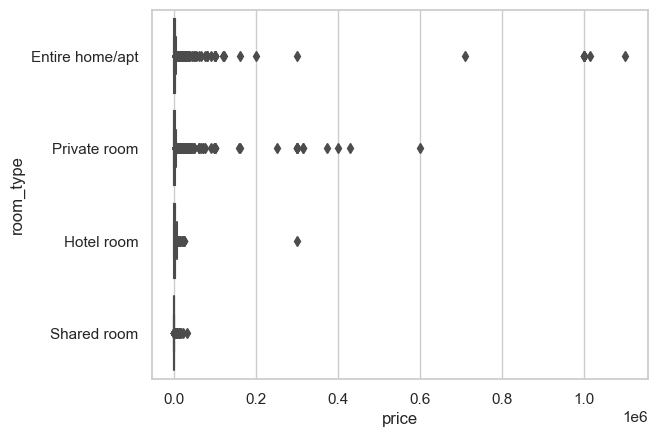

In [365]:
# cek outlier 'price' terhadap 'room_type'
sns.boxplot(data=df_listing_clean, x=df_listing_clean['price'], y =df_listing_clean['room_type'])
plt.show()

Distribusi yang tidak normal, sehingga penggunaan nilai tengah (median) berguna untuk menentukan harga per tipe ruangan tanpa terpengaruh oleh nilai-nilai outlier yang ada.

In [366]:
room_price_med = df_listing_clean.groupby('room_type')[['price']].median().reset_index().rename(columns={'price' : 'med_price'})
room_price_med

,room_type,med_price
0,Entire home/apt,1536.0
1,Hotel room,1700.0
2,Private room,1212.0
3,Shared room,500.0


c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


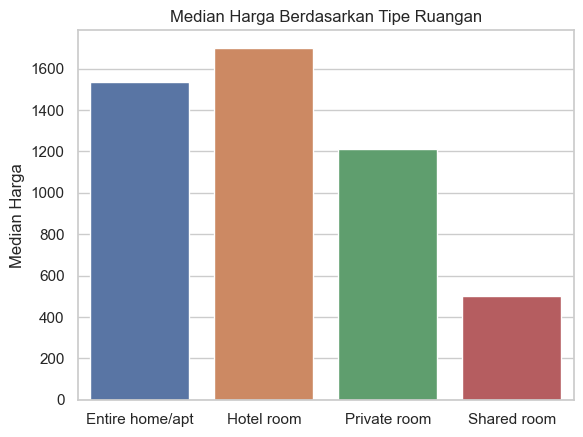

In [367]:
sns.barplot(data=room_price_med, x='room_type', y='med_price')
plt.xlabel('')
plt.ylabel('Median Harga')
plt.title('Median Harga Berdasarkan Tipe Ruangan')
plt.show()

**Hotel room** menunjukkan median harga yang paling tinggi, diduga disebabkan oleh sejumlah faktor seperti fasilitas dan layanan, lokasi yang strategis, atau reputasi hotel yang dikenal di daerah tersebut.

Pada tipe ruangan **Entire home/apartment**, median harga cenderung lebih tinggi dibandingkan private room. Tipe ruangan ini menawarkan keseluruhan rumah atau apartemen bagi pengguna Airbnb untuk digunakan secara eksklusif. Hal ini menyebabkan median harga lebih tinggi, karena memberikan privasi dan ruang yang lebih luas.

Sementara pada tipe ruangan **Private room**, median harga cenderung lebih rendah dibandingkan dengan entire home/apartment. Tipe ruangan ini menawarkan kamar pribadi dalam rumah atau apartemen yang ditempati oleh host atau penghuni lain, sehingga median harganya lebih rendah karena harus berbagi fasilitas dengan penghuni lainnya.

Kemudian, tipe ruangan **Share room** menawarkan tempat tidur bersama dengan pengguna lain dalam kamar yang sama. Dikarenakan pengguna harus berbagi kamar dengan orang lain, median harga untuk share room menjadi yang terendah di antara jenis kamar lainnya.

c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='price', ylabel='Region'>

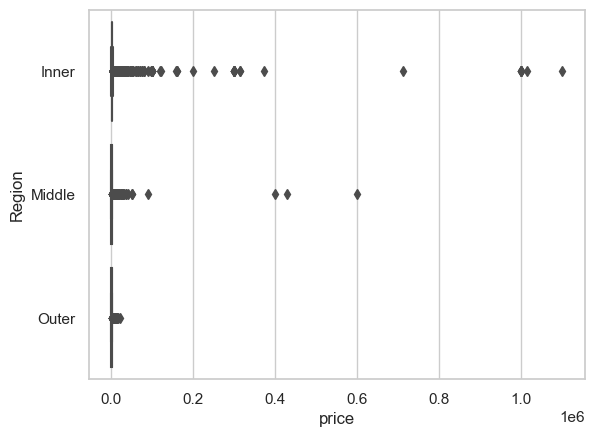

In [368]:
sns.boxplot(data=df_listing_clean, x=df_listing_clean['price'], y =df_listing_clean['Region'])

Karena distribusi harga berdasarkan wilayah tidak terdistribusi secara normal, maka analisis dilakukan dengan uji non-parametrik untuk menilai perbedaan harga antar daerah. Penggunaan median digunakan sebagai metode pembanding untuk memahami variasi harga per daerah tanpa terpengaruh oleh nilai-nilai *outlier*.

In [369]:
from scipy.stats import kruskal, kstest

print(f"cek sebaran data price = {kstest('norm',df_listing_clean['price'])}")

cek sebaran data price = KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1.443576311963903, statistic_sign=1)


In [386]:
stats, pvalue = kruskal(
                        df_listing_clean[df_listing_clean['Region'] == "Inner"]['price'],
                        df_listing_clean[df_listing_clean['Region'] == "Middle"]['price'],
                        df_listing_clean[df_listing_clean['Region'] == "Outer"]['price']
                        )

H0 = "Tidak Ada perbedaan yang signifikan antar wilayah berdasarkan harga"
HA = "Ada perbedaan yang signifikan antar wilayah berdasarkan harga"

if pvalue < 0.05:
    print(f"nilai pvalue =< 0.05 maka H0 ditolak, {HA}")
else:
    print(f"nilai pvalue > 0.05 maka HA diterima, {H0}")

nilai pvalue =< 0.05 maka H0 ditolak, Ada perbedaan yang signifikan antar wilayah berdasarkan harga


In [371]:
med_price_by_room = df_listing_clean.groupby(['room_type', 'Region'])['price'].median().reset_index()
med_price_by_room

,room_type,Region,price
0,Entire home/apt,Inner,1659.0
1,Entire home/apt,Middle,1000.0
2,Entire home/apt,Outer,1352.0
3,Hotel room,Inner,1785.0
4,Hotel room,Middle,1363.0
5,Hotel room,Outer,990.0
6,Private room,Inner,1400.0
7,Private room,Middle,970.0
8,Private room,Outer,850.0
9,Shared room,Inner,500.0


In [372]:
med_price_by_room.groupby('Region')[['price']].sum().reset_index()

,Region,price
0,Inner,5344.0
1,Middle,3833.0
2,Outer,3582.0


c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moh_y\python_project\Env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

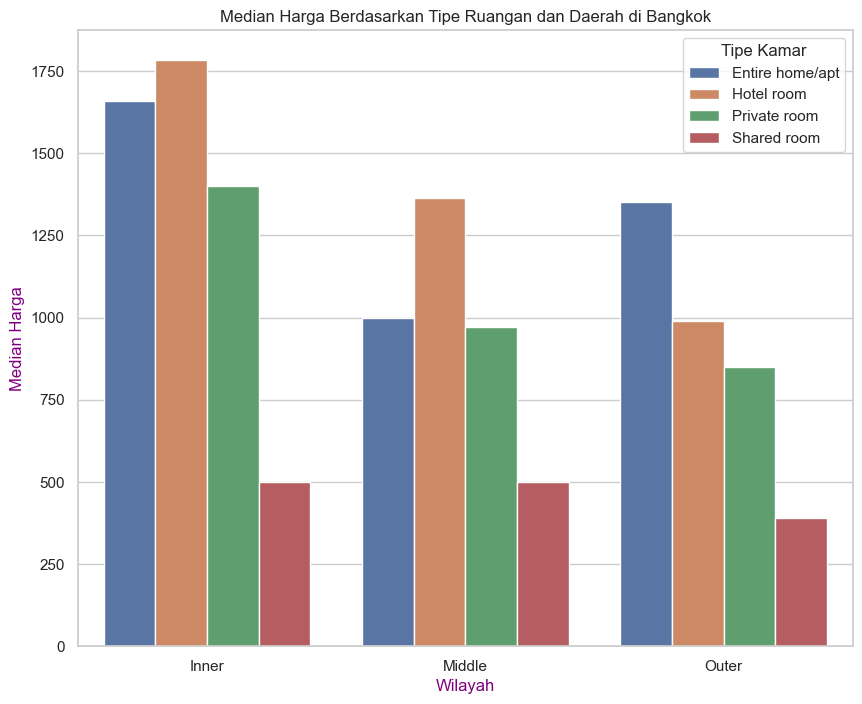

In [373]:
plt.figure(figsize=(10, 8))
sns.barplot(data=med_price_by_room, x='Region', y='price', hue='room_type')
plt.xlabel('Wilayah', color='purple')
plt.ylabel('Median Harga', color='purple')
plt.title('Median Harga Berdasarkan Tipe Ruangan dan Daerah di Bangkok')
plt.legend(title='Tipe Kamar')
plt.show()

Berdasarkan data median harga berdasarkan tipe ruangan dan wilayah (Region) di Bangkok, berikut adalah interpretasi yang didapatkan:

Harga Hotel room dan Entire home/apt di Inner Bangkok merupakan yang paling tinggi dibandingkan dengan Middle Bangkok dan Outer Bangkok berdasarkan median harganya. Data ini menandakan minat yang lebih besar di daerah Inner Bangkok, terutama bagi mereka yang mencari akomodasi premium dengan fasilitas unggul dan lokasi yang berada di pusat kota.

Harga Hotel room berdasarkan median harga yang ada di wilayah middle bangkok menjadi tertinggi diantara semua tipe room dikarenakan wilayah tersebut semakin diminati, baik sebagai destinasi wisata, pusat bisnis, atau pusat aktivitas komersial, permintaan yang meningkat dapat mendorong kenaikan harga.

Sedangkan wilayah outer Bangkok memiliki harga tertinggi untuk Entire home/apt diantara semua tipe room adalah karena lokasinya yang jauh dari pusat kota dan tempat-tempat wisata. Wilayah outer Bangkok lebih banyak dihuni oleh penduduk lokal yang bekerja di sektor industri, pertanian, atau perdagangan. Yang mana ini juga berpengaruh akan harga untuk tipe room Entire home/apt.

# Conclusion

Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan yang dapat diambil untuk mengidentifikasi karakteristik listing berdasarkan wilayah geografisnya di Bangkok:

- Wilayah Inner Bangkok menarik perhatian dengan jumlah reviewer yang paling banyak dibandingkan dengan daerah lain. Dari data tipe ruangan dan harga, tipe Rumah Keseluruhan/Apartemen mendominasi dengan jumlah reviewer terbanyak, yang sangat disukai oleh tamu yang menginginkan privasi dan kenyamanan layaknya di rumah sendiri. Para reviewer cenderung tidak terlalu mempermasalahkan harga asalkan fasilitas yang ditawarkan sesuai dengan preferensi mereka. 

- Sedangkan Wilayah Outer Bangkok menonjol dengan jumlah reviewer yang paling sedikit dibandingkan dengan daerah lain. Dari data mengenai tipe ruangan dan harga, tipe Private Room mendominasi dengan jumlah reviewer terbanyak, yang sangat disukai oleh tamu yang menginginkan privasi dan kenyamanan layaknya di rumah sendiri. Sementara itu, harga tipe Private menempati peringkat terendah, yang mungkin menjadi daya tarik tersendiri bagi reviewer yang tertarik dengan wilayah Outer Bangkok. 

# Rekomendasi

- kita coba lihat host yang memiliki reviewer tertinggi dan terendah di area Inner bangkok yang mana memiliki jumlah reviewer terbanyak dari seluruh wilayah

In [374]:
df_rev_inner = df_listing_clean[df_listing_clean['Region']=='Inner'].groupby('host_id')[['number_of_reviews']].sum().reset_index().sort_values(by='number_of_reviews',ascending=False)
df_rev_inner

,host_id,number_of_reviews
88,1927968,5906
3199,201677068,4689
1457,47324488,4622
1021,30963587,3584
885,26736483,2937
...,...,...
3407,221980605,0
3405,221952167,0
3404,221784542,0
1886,69289704,0


In [385]:
id_1927968 = df_listing_clean[(df_listing_clean['host_id']==1927968) & (df_listing_clean['Region']=='Inner')].sort_values(by='price')
print(f"{len(id_1927968)}")
id_1927968

31


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Region
403,4471377,⍣Heavenly Bed⍣Sky Views⍣Cool&Quiet BKK Center/MRT⍣,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,593,1,103,1.05,37,301,6,Inner
242,2394858,Cool and Comfortable MRT in the Shadows of Silom,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,600,1,146,1.36,37,358,3,Inner
208,2294502,✭✭✭✭Cozy Hideawy in BKK Center near MRT Lumpini✭✭✭,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,609,1,156,1.45,37,312,7,Inner
5909,29065150,✢Street Food✢Fun@Your Doorstep BKK center✢MRT✢,1927968,Evan,Sathon,13.72083,100.54726,Entire home/apt,626,1,54,1.05,37,326,7,Inner
346,4379681,"✯Cool, colorful and Private near MRT Central BKK✯",1927968,Evan,Sathon,13.72066,100.54713,Entire home/apt,650,1,106,1.07,37,315,1,Inner
1900,12331724,"✻✻Easy, Fun, Comfort✻Quiet Studio Bkk Center✢MRT✻✻",1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,651,1,139,1.71,37,312,5,Inner
826,6772845,☙☙☙Unbeatable Comfort with MRT and Skyline Views❧❧,1927968,Evan,Sathon,13.72065,100.54712,Entire home/apt,686,1,99,1.10,37,352,10,Inner
129,605343,✬Sweet Dreams in the Center of Bangkok@Sky House✬,1927968,Evan,Sathon,13.72062,100.54709,Entire home/apt,693,1,224,1.84,37,349,4,Inner
122,580270,✴✴Colorful Room with Soaring Views in Center BKK✴✴,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,707,1,93,0.95,37,346,11,Inner
1901,12332076,✾Heavenly Bed With Cool View✢MRT✢Street food✾,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,721,1,133,1.73,37,323,9,Inner


In [376]:
id_492665929 = df_listing_clean[(df_listing_clean['host_id']==492665929) & (df_listing_clean['Region']=='Inner')].sort_values(by='price')
print(f"{len(id_492665929)}")
id_492665929.head()

1


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Region
15806,789533004095538661,1BR Skyline View. Pool gym sauna,492665929,Ana Elena,Khlong Toei,13.709974,100.593226,Entire home/apt,1444,1,0,0.0,1,24,0,Inner


In [377]:
id_221784542 = df_listing_clean[(df_listing_clean['host_id']==221784542) & (df_listing_clean['Region']=='Inner')].sort_values(by='price')
print(f"{len(id_221784542)}")
id_221784542.head()

1


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Region
12144,53537007,プールがある美しいコンドミニアム,221784542,晴花,Vadhana,13.72554,100.58289,Private room,835,1,0,0.0,1,0,0,Inner


In [378]:
id_221952167 = df_listing_clean[(df_listing_clean['host_id']==221952167) & (df_listing_clean['Region']=='Inner')].sort_values(by='price')
print(f"{len(id_221952167)}")
id_221952167.head()

1


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Region
6036,29466822,Once@One Sathorn Narathiward Soi4,221952167,Pannawat,Sathon,13.71822,100.53106,Private room,1500,3,0,0.0,1,181,0,Inner


- kita coba lihat host yang memiliki reviewer tertinggi dan terendah di area Outer yang mana memiliki jumlah reviewer terendah dari seluruh wilayah

In [379]:
df_rev_outer = df_listing_clean[df_listing_clean['Region']=='Outer'].groupby('host_id')[['number_of_reviews']].sum().reset_index().sort_values(by='number_of_reviews',ascending=False)
df_rev_outer

,host_id,number_of_reviews
69,35462876,1112
200,158545122,901
97,48491149,501
169,128820736,326
46,26397198,282
...,...,...
261,220409249,0
118,69212374,0
117,64624459,0
114,61476163,0


In [380]:
id_35462876 = df_listing_clean[(df_listing_clean['host_id']==35462876) & (df_listing_clean['Region']=='Outer')].sort_values(by='price')
print(f"{len(id_35462876)}")
id_35462876

9


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Region
827,6773889,Nature Vibes Studio 10 mins to Don Mueang Airport,35462876,Wuthiphon,Lak Si,13.87081,100.57824,Private room,750,1,163,2.49,9,364,4,Outer
4238,21669858,Studio Room 10 mins to Don Mueang Airport (DMK),35462876,Wuthiphon,Lak Si,13.86942,100.57981,Private room,750,1,175,2.81,9,364,11,Outer
7965,35017301,"Stylish room, 10 mins to Don Mueang Int'l Airport",35462876,Wuthiphon,Lak Si,13.87244,100.58147,Private room,750,1,4,0.09,9,365,1,Outer
1469,9453616,Houseplant room 10 mins to Don Mueang Airport(DMK),35462876,Wuthiphon,Lak Si,13.86939,100.57829,Private room,800,1,121,1.77,9,362,2,Outer
4453,22973967,Nature Twin Bed room 10 mins to DMK Airport,35462876,Wuthiphon,Lak Si,13.86998,100.58045,Private room,800,1,98,1.64,9,361,2,Outer
7949,35010648,"Twin beds, 10 mins to Don Mueang Airport (DMK)",35462876,Wuthiphon,Lak Si,13.87233,100.58088,Private room,800,1,0,0.00,9,365,0,Outer
1470,9453790,37 Nature House: 10 mins to DMK Int'l Airport,35462876,Wuthiphon,Lak Si,13.87145,100.58039,Entire home/apt,1039,1,533,6.22,9,346,18,Outer
7932,34981246,"Family room 2 Beds, 10 mins to Don Mueang Airport",35462876,Wuthiphon,Lak Si,13.87080,100.58138,Private room,1500,1,2,0.05,9,365,1,Outer
6876,32112076,297 Nature Residence: 3 BRs 10 mins to DMK airport,35462876,Wuthiphon,Lak Si,13.87070,100.57983,Entire home/apt,3800,1,16,0.34,9,365,0,Outer


In [381]:
id_220409249 = df_listing_clean[(df_listing_clean['host_id']==220409249) & (df_listing_clean['Region']=='Outer')].sort_values(by='price')
print(f"{len(id_220409249)}")
id_220409249.head()

1


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Region
7493,33894033,Burerom.village near airport 46/35soi kubon41,220409249,Suchathis,Khlong Sam Wa,13.86279,100.68846,Entire home/apt,734,3,0,0.0,1,180,0,Outer


In [382]:
id_69212374 = df_listing_clean[(df_listing_clean['host_id']==69212374) & (df_listing_clean['Region']=='Outer')].sort_values(by='price')
print(f"{len(id_69212374)}")
id_69212374.head()

1


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Region
2979,17195964,Grandma's Tim Southernbus Terminal,69212374,Suwadee,Taling Chan,13.77837,100.42077,Private room,382,1,0,0.0,1,87,0,Outer


In [383]:
id_170101577 = df_listing_clean[(df_listing_clean['host_id']==170101577) & (df_listing_clean['Region']=='Outer')].sort_values(by='price')
print(f"{len(id_170101577)}")
id_170101577.head()

1


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Region
4721,23909989,Shi,170101577,L.Shi,Lat Krabang,13.72121,100.71926,Private room,836,1,0,0.0,1,364,0,Outer


Rekomendasi ini dibuat untuk wilayah yang memiliki jumlah reviewer tertinggi dan terendah di wilayah dengan karakteristik yang paling sesuai.

1. Untuk wilayah Inner yang mana memiliki reviewer tertinggi <br><br>
dapat kita dilihat bahwa host_id = **1927968** yang mempunyai jumlah reviewer tertinggi di daerah Inenr mempunyai karakteristik seperti mempunyai beberapa listing pada kolom `calculated_host_listings_count` dan harga yang bermacam seperti yang dilihat pada kolom `price`. dapat kita lihat juga host dengan reviewer terendah, seperti host_id = **492665929, 221784542, 221952167**. <br><br>
Pada analisis ini, terlihat bahwa harga yang tinggi tidak menjamin rendahnya jumlah reviewer, begitu pula sebaliknya untuk harga yang rendah. Dan juga bisa kita lihat `host_id` = **1927968** yang mempunyai `calculated_host_listings_count` = 31 cenderung berpengalaman dalam mengolah listing yang ada.<br><br>
karena ini merupakan user asli, maka bisa kita langsung cek : <br><br>
https://www.airbnb.co.id/users/show/1927968      >>  pemilik jumlah review terbanyak di wilayah Inner bangkok<br>
https://www.airbnb.co.id/users/show/492665929    >>  sample pemilik jumlah review terendah di wilayah Inner bangkok<br>
https://www.airbnb.co.id/users/show/221784542    >>  sample pemilik jumlah review terendah di wilayah Inner bangkok<br>
https://www.airbnb.co.id/users/show/221952167    >>  sample pemilik jumlah review terendah di wilayah Inner bangkok<br><br>
Rekomendasi yang bisa diberikan adalah untuk host yang memiliki jumlah reviewer terndah di wilayah Inner Bangkok agar bisa mencontoh karakteristik host_id = **1927968** yang memiliki jumlah reviewer tertinggi di daerah Inner.<br><br>

2. Untuk wilayah outer yang mana memiliki reviewer terendah <br><br>
dapat kita dilihat bahwa host_id = **35462876** yang mempunyai jumlah reviewer tertinggi di daerah Outer mempunyai karakteristik seperti mempunyai beberapa listing pada kolom `calculated_host_listings_count` dan harga yang bermacam seperti yang dilihat pada kolom `price`. dapat kita lihat juga host dengan reviewer terendah, seperti host_id = **220409249, 69212374, 170101577**. <br><br>
Pada analisis ini, terlihat bahwa harga yang tinggi tidak menjamin rendahnya jumlah reviewer, begitu pula sebaliknya untuk harga yang rendah. Dan juga bisa kita lihat `host_id` = **35462876** yang mempunyai `calculated_host_listings_count` = 9 cenderung berpengalaman dalam mengolah listing yang ada. dan yang menarik adalah tipe ruangan yang dimiliki oleh host ini adalah private room yang mana menempati peringkat 3 tertinggi dari jumlah viewer yang ada di daerah Outer.<br><br>
karena ini merupakan user asli, maka bisa kita langsung cek : <br><br>
https://www.airbnb.co.id/users/show/35462876    >>  pemilik jumlah review terbanyak di wilayah Outer bangkok<br>
https://www.airbnb.co.id/users/show/220409249   >>  sample pemilik jumlah review terendah di wilayah Outer bangkok<br>
https://www.airbnb.co.id/users/show/69212374    >>  sample pemilik jumlah review terendah di wilayah Outer bangkok<br>
https://www.airbnb.co.id/users/show/170101577   >>  sample pemilik jumlah review terendah di wilayah Outer bangkok<br><br>
Rekomendasi yang bisa diberikan adalah untuk host yang memiliki jumlah reviewer terendah di wilayah Outer Bangkok agar bisa mencontoh karakteristik host_id = **35462876**, seperti memberi harga tidak terlalu murah maupun tidak terlalu mahal. kita juga bisa memilih tipe ruangan yang tidak terlalu mainstream seperti yang dilakukan host_id = **35462876**, alih alih memilih tipe ruangan Rumah Keseluruhan/Apartemen pemilik host lebih memilih tipe ruangan Private room.

In [384]:
df_listing_clean.to_csv("Airbnb Listings Bangkok Clean.csv", index=False)